# Analysis of Tech Company Salaries

![techCompanies](tech_logos.png) 

This notebook takes a look into a dataset populated with information on tech employees working at various companies.  Our mission is to find and measure variables that may have an impact on the salary of an individual.

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [252]:
# Load the dataset
df = pd.read_csv('tech_companies_salary.csv')

In [253]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [254]:
# Number of null values in each column
df.isna().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

# Drop data with null values

Dropping the data of the gender, education, company, race, tag, and level columns, cleans up the data in order to look at the relationship of these variables on salaries.  These values cannot be replaced without potentially skewing the data.

In [255]:
# Remove rows with null values in subset columns
df = df.dropna(subset=['gender', 'Education', 'company', 'Race', 'tag', 'level'])
# Verify removal
print(df.isna().sum())

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64


## Updated Summary Statistics

In [256]:
df.size

623935

In [257]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2.151500e+04,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000
mean,1.979508e+05,7.127167,2.706995,133894.538694,44974.392424,18401.301418,10177.354218,561.242436,59207.188891,0.421055,0.506577,0.042854,0.013944,0.015710,0.528887,0.355612,0.035417,0.030769,0.049361
std,1.331313e+05,5.848876,3.328438,57231.645682,72523.732291,24802.564405,7677.552448,315.744730,14561.633489,0.493740,0.499968,0.202532,0.117260,0.124354,0.499176,0.478710,0.184836,0.172696,0.216625
min,1.000000e+04,0.000000,0.000000,4000.000000,0.000000,0.000000,10.000000,0.000000,21208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.190000e+05,3.000000,0.000000,100000.000000,0.000000,3000.000000,7322.000000,501.000000,47070.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.740000e+05,6.000000,2.000000,135000.000000,20000.000000,13000.000000,8198.000000,751.000000,59849.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.450000e+05,10.000000,4.000000,165000.000000,55000.000000,25000.000000,11521.000000,807.000000,71599.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,954000.000000,900000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Subsetting dataframe to remove redundant columns

In [258]:
df = df[['totalyearlycompensation', 'basesalary', 'bonus', 'company', 'cityid', 'location', 'level', 'title', 'tag', 'yearsofexperience',
        'yearsatcompany', 'stockgrantvalue', 'dmaid', 'rowNumber', 'Race', 'Education', 'gender']]

## Method to split the location column into city and state columns.

Locations with more than 2 strings delimited by a comma will be set to null values.  These locations correspond to locations outside of the United States.

Limiting our scope of the data to within the U.S. will increase the accuracy and usefulness of our model, as well as eliminate some outliers in the data.

In [259]:
def split_location(loc):
    location = loc.split(', ')  
    if len(location) == 2:
        city = location[0]
        state = location[1]
    else:
        city = None
        state = None
    return pd.Series([city, state])

df[['City', 'State']] = df['location'].apply(split_location)

### Verifying results of creating new columns and dropping data with null values in state column.

Dropping these results further eliminates international entries.

In [260]:
df.State.unique()

array(['CA', 'WA', 'TX', None, 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO',
       'FL', 'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN',
       'LA', 'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK',
       'NV', 'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI',
       'NH', 'NM', 'ND', 'VT', 'WY', 'ME'], dtype=object)

In [261]:
# Remove rows with null values in State column
df = df.dropna(subset='State')
# Verify removal
print(df.isna().sum())

totalyearlycompensation    0
basesalary                 0
bonus                      0
company                    0
cityid                     0
location                   0
level                      0
title                      0
tag                        0
yearsofexperience          0
yearsatcompany             0
stockgrantvalue            0
dmaid                      0
rowNumber                  0
Race                       0
Education                  0
gender                     0
City                       0
State                      0
dtype: int64


### Verification that columns contain unique and non-redundant values

In [262]:
df.Education.unique()

array(['PhD', "Bachelor's Degree", "Master's Degree", 'Some College',
       'Highschool'], dtype=object)

In [263]:
df.Race.unique()

array(['Asian', 'Two Or More', 'White', 'Hispanic', 'Black'], dtype=object)

In [264]:
df.title.unique()

array(['Software Engineer', 'Software Engineering Manager',
       'Hardware Engineer', 'Product Designer', 'Management Consultant',
       'Product Manager', 'Solution Architect', 'Sales',
       'Technical Program Manager', 'Data Scientist', 'Recruiter',
       'Mechanical Engineer', 'Business Analyst', 'Human Resources',
       'Marketing'], dtype=object)

### Formatting of the company category eliminates redundant values

In [265]:
df['company'] = df['company'].apply(lambda company: company.upper())

### Exporting dataframe for external use and backup purposes

In [266]:
#df.to_csv('updated_base_df.csv')

### Importing CSV loaded with stock market information to merge with original dataframe.

In [267]:
stocks_df = pd.read_csv('screener-stocks.csv')
stocks_df.head()

,Symbol,Company Name,Market Cap,Stock Price,% Change,Industry,PE Ratio,Ent. Value,MC Group,Sector,...,Oper. Margin,Pretax Margin,Profit Margin,R&D / Rev,Avg. Volume,Rel. Volume,RSI,Tax / Revenue,Rev Gr. This Q,Rev Gr. Next Q
0,FLWS,1-800-FLOWERS.COM,6.965698e+08,10.92,1.11%,Specialty Retail,NaN,7.024748e+08,Small-Cap,Consumer Discretionary,...,-2.89%,-3.39%,-3.24%,3.20%,420598.0,77.96%,59.81,-0.15%,-5.95%,-3.19%
1,VCXB,10X Capital Venture Acquisition Corp. III,1.421026e+08,10.77,NaN,Shell Companies,63.35,1.420773e+08,Micro-Cap,Financials,...,NaN,NaN,NaN,NaN,10038.0,0.12%,60.96,NaN,NaN,NaN
2,TXG,10x Genomics,4.316825e+09,36.89,1.77%,Health Information Services,NaN,4.023500e+09,Mid-Cap,Healthcare,...,-42.88%,-40.21%,-41.23%,43.69%,1403080.0,74.62%,34.24,1.02%,7.41%,8.17%
3,YI,"111, Inc.",8.735293e+07,1.01,-2.88%,Pharmaceutical Retailers,NaN,3.884045e+07,Micro-Cap,Healthcare,...,-2.30%,-2.58%,-2.63%,0.82%,81508.0,102.12%,27.80,0.00%,NaN,NaN
4,YQ,17 Education & Technology Group,3.065829e+07,2.97,NaN,Education & Training Services,NaN,-3.290321e+07,Nano-Cap,Consumer Staples,...,-196.68%,-178.90%,-182.37%,96.36%,18790.0,16.56%,54.54,NaN,NaN,NaN


### Creating a company column with reformatted company names creates a column that can merge the datasets.

Removal of the reference to ticker GOOGL, in order to merge data corresponding to ticker GOOG.

In [268]:
stocks_df['company'] = stocks_df['Company Name'].apply(lambda company: company.upper())
stocks_df.drop(stocks_df.loc[stocks_df['Symbol']=='GOOGL'].index, inplace=True)

### Reassignment of company names in original dataset to corresponding company names in stock dataset.

In [269]:
df.loc[ df['company'] == 'GOOGLE', 'company'] = 'ALPHABET'
df.loc[ df['company'] == 'AMAZON', 'company'] = 'AMAZON.COM'
df.loc[ df['company'] == 'FACEBOOK', 'company'] = 'META PLATFORMS'
df.loc[ df['company'] == 'PAYPAL', 'company'] = 'PAYPAL HOLDINGS'
df.loc[ df['company'] == 'HSBC', 'company'] = 'HSBC HOLDINGS'
df.loc[ df['company'] == 'APPLE INC.', 'company'] = 'APPLE'
df.loc[ df['company'] == '2U', 'company'] = '2U, INC.'
df.loc[ df['company'] == 'ABBOTT', 'company'] = 'ABBOTT LABORATORIES'
df.loc[ df['company'] == '8X8', 'company'] = '8X8, INC.'
df.loc[ df['company'] == 'ADP', 'company'] = 'Automatic Data Processing'.upper()
df.loc[ df['company'] == 'AFFIRM', 'company'] = 'AFFIRM HOLDINGS'
df.loc[ df['company'] == 'AMD', 'company'] = 'ADVANCED MICRO DEVICES'
df.loc[ df['company'] == 'INTEL CORPORATION', 'company'] = 'INTEL'
df.loc[ df['company'] == 'IBM', 'company'] = 'INTERNATIONAL BUSINESS MACHINES'
df.loc[ df['company'] == 'CAPITAL ONE', 'company'] = 'CAPITAL ONE FINANCIAL'
df.loc[ df['company'] == 'CISCO', 'company'] = 'CISCO SYSTEMS'
df.loc[ df['company'] == 'JPMORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'UBER', 'company'] = 'UBER TECHNOLOGIES'
df.loc[ df['company'] == 'GOLDMAN SACHS', 'company'] = 'THE GOLDMAN SACHS GROUP'
df.loc[ df['company'] == 'WALMART LABS', 'company'] = 'WALMART'
df.loc[ df['company'] == 'EBAY', 'company'] = 'EBAY INC.'
df.loc[ df['company'] == 'VISA', 'company'] = 'VISA INC.'
df.loc[ df['company'] == 'LYFT', 'company'] = 'LYFT, INC.'
df.loc[ df['company'] == 'SAP', 'company'] = 'SAP SE'
df.loc[ df['company'] == 'DELL', 'company'] = 'DELL TECHNOLOGIES'
df.loc[ df['company'] == 'BOEING', 'company'] = 'THE BOEING COMPANY'
df.loc[ df['company'] == 'GENERAL MOTORS', 'company'] = 'GENERAL MOTORS COMPANY'
df.loc[ df['company'] == 'T-MOBILE', 'company'] = 'T-MOBILE US'

### Initial merge of the data sets

In [270]:
agg_df = pd.merge(df, stocks_df, on="company", how="left")
print(agg_df['Symbol'].isna().sum())

5093


In [271]:
counts = agg_df['company'].value_counts()
print(counts.head(10))

company
AMAZON.COM                         2090
MICROSOFT                          1299
ALPHABET                           1104
META PLATFORMS                      867
APPLE                               569
ORACLE                              309
INTEL                               303
INTERNATIONAL BUSINESS MACHINES     277
CAPITAL ONE FINANCIAL               267
CISCO SYSTEMS                       262
Name: count, dtype: int64


### Eliminating Remaining Null Values

To eliminate the remaining null values of the symbol column, the entries were researched and a symbol was manually entered into the dataset. Private companies were assigned "Private", while ambiguous and government companies were left null.  The latter to be dropped.

This dataset was then merged on the "Symbol" column to fill in missing values and the dataset was saved as final_aggregated_df.csv.

Column names were updated in order to follow a uniform naming convention.

# Import of aggregated dataset

In [2]:
df = pd.read_csv('final_aggregated_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,total_yearly_compensation,base_salary,bonus,company,city_id,location,state,city,...,pretax_margin,profit_margin,research_development_over_revenue,average_volume,relative_volume,rsi,tax_over_revenue,revenue_growth_this_quarter,revenue_growth_next_quarter,sex
0,5928,0,400000,210000,45000,ALPHABET,7472,"Sunnyvale, CA",CA,Sunnyvale,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
1,10063,1,136000,124000,11000,MICROSOFT,11521,"Redmond, WA",WA,Redmond,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
2,5929,2,337000,177000,36000,ALPHABET,7413,"San Bruno, CA",CA,San Bruno,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
3,10064,3,222000,164000,20000,MICROSOFT,11527,"Seattle, WA",WA,Seattle,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
4,3787,4,187000,165000,0,BLEND,7419,"San Francisco, CA",CA,San Francisco,...,-113.87%,-118.15%,52.02%,1863929.0,43.24%,56.52,0.06%,-5.65%,-0.47%,Male


In [3]:
df.shape

(16903, 92)

# Subsetting and Cleaning Workable Dataset

In [4]:
print(df['symbol'].isna().sum())

126


In [5]:
# droppin entries with null values in the symbol column removes ambiguous and government companies
df = df.dropna(subset='symbol')

## Subset data into International, Private, and Public Companies

In [6]:
# Saved to potentially use later
international_companies = df.loc[df['symbol'] == 'INTERNATIONAL']

In [7]:
international_companies.shape

(288, 92)

In [8]:
# drop entries where symbol is international
public_companies = df.drop(df[df['symbol'] == 'INTERNATIONAL'].index)

In [9]:
# Saved to potentially use later
private_companies = df.loc[df['symbol'] == 'PRIVATE']

In [10]:
private_companies.shape

(2281, 92)

In [11]:
# drop entries where sympol is private
public_companies = public_companies.drop(public_companies[public_companies['symbol'] == 'PRIVATE'].index)

In [12]:
public_companies.shape

(14208, 92)

# Subsetting Columns for Analysis

In [13]:
public_companies = public_companies[['base_salary', 'total_yearly_compensation', 'title', 'years_of_experience', 
                                            'years_at_company', 'education', 'race', 'sex', 'mc_group', 'sector', 
                                            'industry', 'employees', 'revenue_per_employee', 'profit_per_employee',
                                            'cash_over_market_cap', 'debt_growth_year_over_year', 'rsi']]

In [14]:
public_companies.head()

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,sex,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,rsi
0,210000,400000,Software Engineer,5,5,PhD,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
1,124000,136000,Software Engineer,3,2,Bachelor's Degree,Two Or More,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
2,177000,337000,Software Engineer,6,6,Bachelor's Degree,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
3,164000,222000,Software Engineer,4,4,Master's Degree,Asian,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
4,165000,187000,Software Engineer,5,0,Bachelor's Degree,White,Male,Small-Cap,Technology,Software - Application,881.0,178032.0,-210352.0,-1.06%,-36.23%,56.52


In [15]:
public_companies.isna().sum()

base_salary                     0
total_yearly_compensation       0
title                           0
years_of_experience             0
years_at_company                0
education                       0
race                            0
sex                             0
mc_group                        0
sector                          0
industry                        0
employees                      11
revenue_per_employee           32
profit_per_employee            22
cash_over_market_cap            0
debt_growth_year_over_year    144
rsi                             8
dtype: int64

# Data Normalization

Reducing the scale of the numbers in the data will aid in finding a relationship between variables.

In [16]:
# New columns are created corresponding to original columns with values divided by 100k
public_companies['total_yearly_compensation_norm'] = public_companies['total_yearly_compensation'].div(100000).round(8)
public_companies['base_salary_norm'] = public_companies['base_salary'].div(100000).round(8)
public_companies['employees_norm'] = public_companies['employees'].div(100000).round(8)
public_companies['revenue_per_employee_norm'] = public_companies['revenue_per_employee'].div(100000).round(8)
public_companies['profit_per_employee_norm'] = public_companies['profit_per_employee'].div(100000).round(8)

In [17]:
public_companies.loc[:,['total_yearly_compensation','total_yearly_compensation_norm',
                        'base_salary', 'base_salary_norm', 'employees', 'employees_norm',
                        'revenue_per_employee', 'revenue_per_employee_norm',
                        'profit_per_employee', 'profit_per_employee_norm']].head()

,total_yearly_compensation,total_yearly_compensation_norm,base_salary,base_salary_norm,employees,employees_norm,revenue_per_employee,revenue_per_employee_norm,profit_per_employee,profit_per_employee_norm
0,400000,4.00,210000,2.10,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
1,136000,1.36,124000,1.24,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
2,337000,3.37,177000,1.77,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
3,222000,2.22,164000,1.64,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
4,187000,1.87,165000,1.65,881.0,0.00881,178032.0,1.78032,-210352.0,-2.10352


In [18]:
# columns with percentages as entries are reformatted and divided by 100
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year'].str.rstrip('%')
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].astype(float)
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].div(100).round(8)

public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap'].str.rstrip('%')
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].astype(float)
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].div(100).round(8)

In [19]:
public_companies.loc[:,['debt_growth_year_over_year', 'debt_growth_year_over_year_norm', 'cash_over_market_cap', 'cash_over_market_cap_norm']].head()

,debt_growth_year_over_year,debt_growth_year_over_year_norm,cash_over_market_cap,cash_over_market_cap_norm
0,-5.47%,-0.0547,4.54%,0.0454
1,47.01%,0.4701,-0.23%,-0.0023
2,-5.47%,-0.0547,4.54%,0.0454
3,47.01%,0.4701,-0.23%,-0.0023
4,-36.23%,-0.3623,-1.06%,-0.0106


# Numerical Data: Summary Statistics and Visualizations

In [20]:
# Method to process and remove outliers from dataset
def processOutliers(dataframe, column):
    lowerThreshold = dataframe[column].quantile(.01)
    upperThreshold = dataframe[column].quantile(.99)

    dataframe = dataframe[(public_companies[column] < upperThreshold) & (dataframe[column] > lowerThreshold)]

    return dataframe

## Individual Data
### Normalized Total Yearly Compensation Column

In [21]:
public_companies['total_yearly_compensation_norm'].describe()

count    14208.000000
mean         2.280078
std          1.364616
min          0.160000
25%          1.500000
50%          1.980000
75%          2.700000
max         49.800000
Name: total_yearly_compensation_norm, dtype: float64

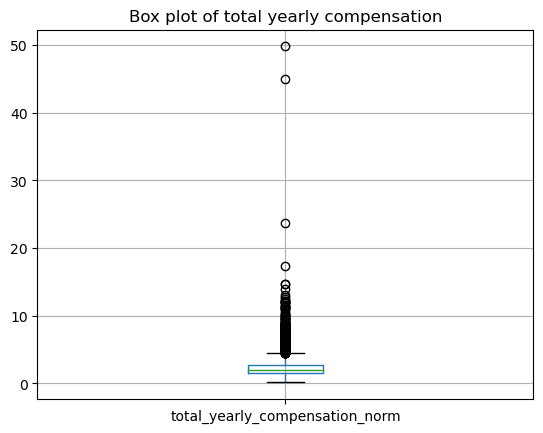

In [22]:
public_companies.boxplot('total_yearly_compensation_norm')
plt.title('Box plot of total yearly compensation')
plt.show()

### Normalized Base Salary Column

In [23]:
public_companies['base_salary_norm'].describe()

count    14208.000000
mean         1.505677
std          0.493365
min          0.100000
25%          1.200000
50%          1.460000
75%          1.710000
max          8.930000
Name: base_salary_norm, dtype: float64

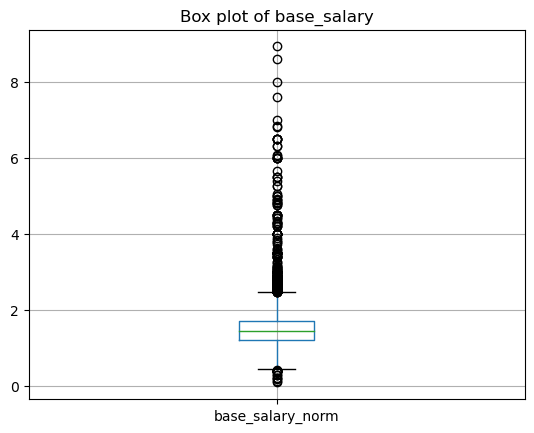

In [24]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')

plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['base_salary_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of base_salary', color='white')
plt.xlabel("base_salary_norm", color='white')
plt.ylabel("Salary (per 100k)", color='white')
plt.show()

In [25]:
public_companies = processOutliers(public_companies, 'base_salary_norm')

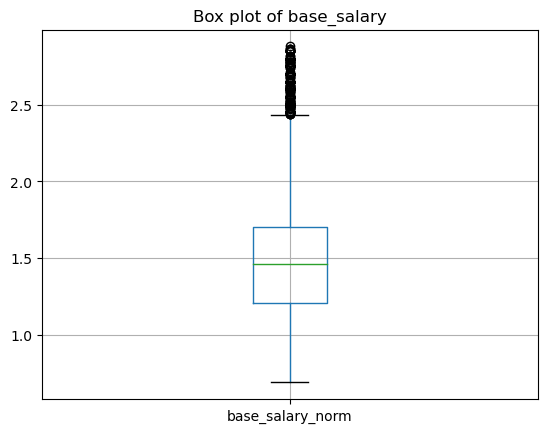

In [26]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['base_salary_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of base_salary', color='white')
plt.xlabel("base_salary_norm", color='white')
plt.ylabel("Salary (per 100k)", color='white')
plt.show()

### Years of Experience Column

In [27]:
public_companies['years_of_experience'].describe()

count    13917.000000
mean         7.327369
std          6.096159
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         45.000000
Name: years_of_experience, dtype: float64

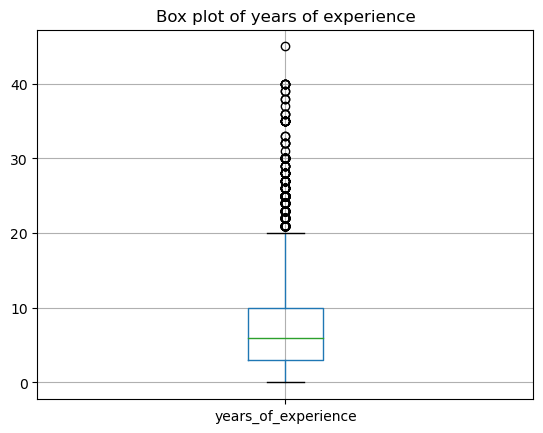

In [28]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

In [29]:
#public_companies = processOutliers(public_companies, 'years_of_experience')

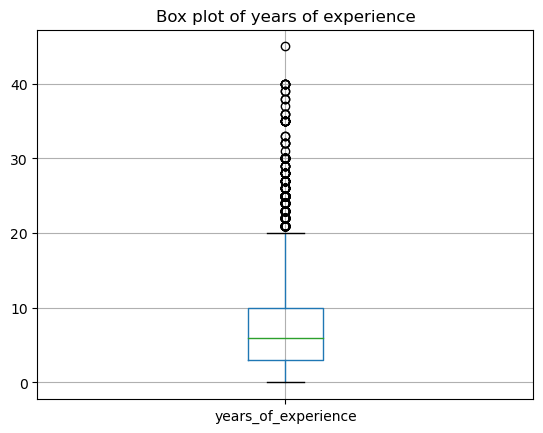

In [30]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

### Years at Company Column

In [31]:
public_companies['years_at_company'].describe()

count    13917.000000
mean         2.856291
std          3.561441
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         40.000000
Name: years_at_company, dtype: float64

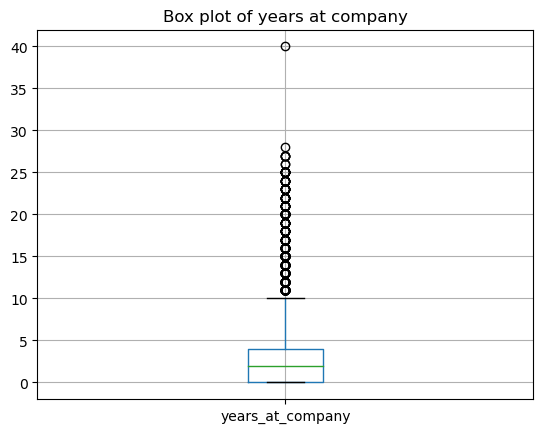

In [32]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

In [33]:
public_companies = processOutliers(public_companies, 'years_at_company')

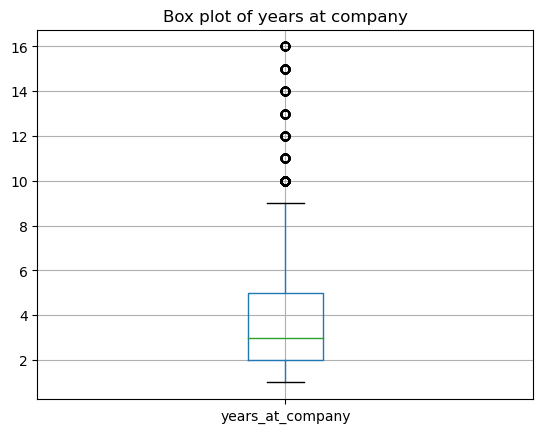

In [34]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

## Company Data

### Normalized Number of Employees Column

In [35]:
public_companies['employees_norm'].describe()

count    9927.000000
mean        3.405896
std         5.355428
min         0.000070
25%         0.302500
50%         1.248000
75%         2.210000
max        21.000000
Name: employees_norm, dtype: float64

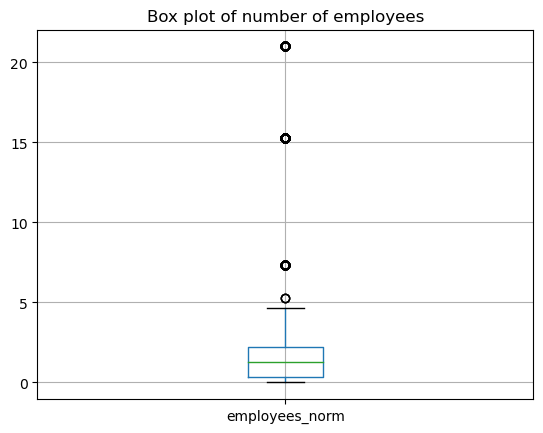

In [36]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

In [37]:
public_companies = processOutliers(public_companies, 'employees_norm')

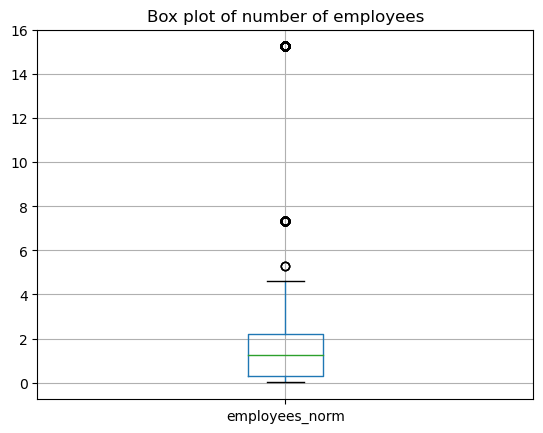

In [38]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

### Normalized Revenue per Employee Column

In [39]:
public_companies['revenue_per_employee_norm'].describe()

count    9700.000000
mean        9.271152
std         9.214927
min         0.346780
25%         3.769080
50%         6.741220
75%        11.580210
max       128.519690
Name: revenue_per_employee_norm, dtype: float64

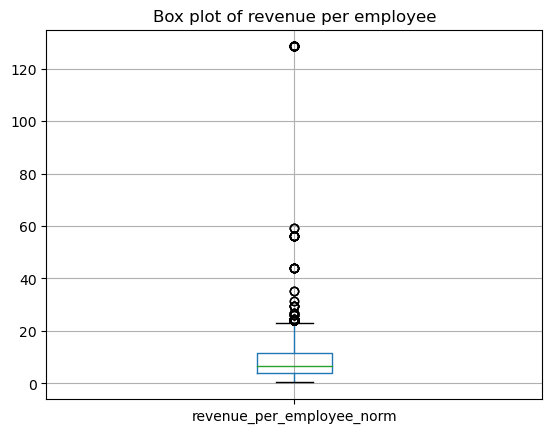

In [40]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

In [41]:
public_companies = processOutliers(public_companies, 'revenue_per_employee_norm')

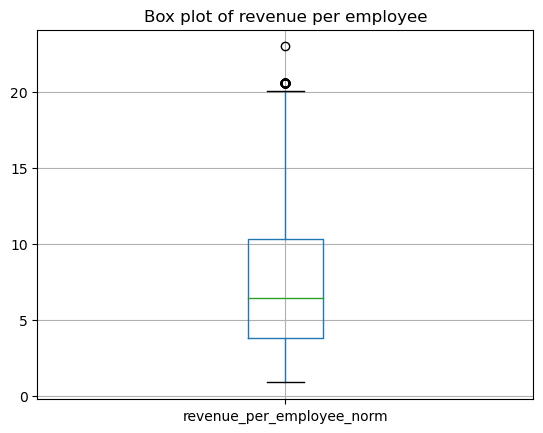

In [42]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

### Normalized Profit per Employee Column

In [43]:
public_companies['profit_per_employee_norm'].describe()

count    9068.000000
mean        1.674191
std         2.106639
min        -4.688420
25%         0.199510
50%         0.648960
75%         3.734890
max        10.054050
Name: profit_per_employee_norm, dtype: float64

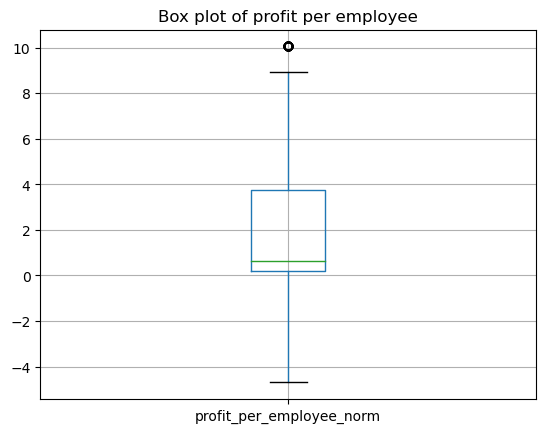

In [44]:
public_companies.boxplot('profit_per_employee_norm')
plt.title('Box plot of profit per employee')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['profit_per_employee_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of profit per employee', color='white')
plt.xlabel("profit_per_employee_norm", color='white')
plt.ylabel("Profit per employee (per 100k)", color='white')
plt.show()

### Normalized Debt Growth (YoY) column

In [45]:
public_companies['debt_growth_year_over_year_norm'].describe()

count    9006.000000
mean        0.100341
std         0.304551
min        -0.915000
25%        -0.045300
50%        -0.010000
75%         0.203800
max        14.550800
Name: debt_growth_year_over_year_norm, dtype: float64

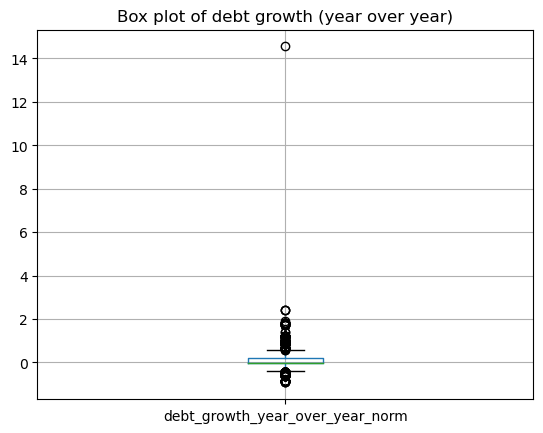

In [46]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

In [47]:
public_companies = processOutliers(public_companies, 'debt_growth_year_over_year_norm')

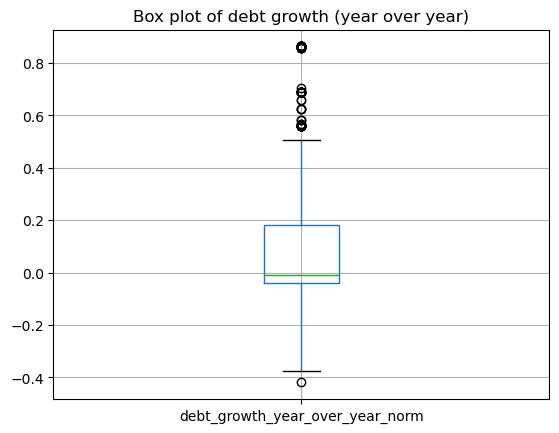

In [48]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

### Normalized Cash Over Market Cap Column

In [49]:
public_companies['cash_over_market_cap_norm'].describe()

count    8660.000000
mean       -0.194703
std         1.303458
min       -42.670200
25%        -0.122400
50%        -0.021800
75%         0.022300
max         2.920500
Name: cash_over_market_cap_norm, dtype: float64

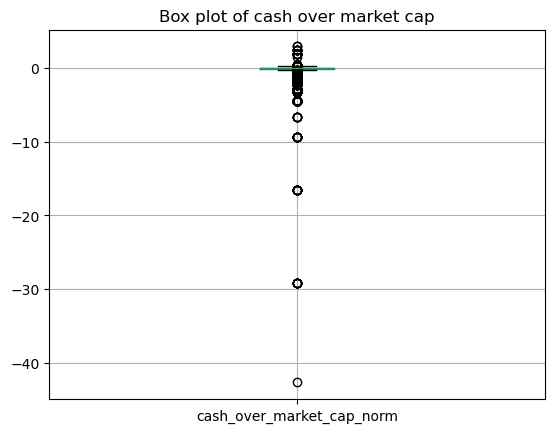

In [50]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

In [51]:
public_companies = processOutliers(public_companies, 'cash_over_market_cap_norm')

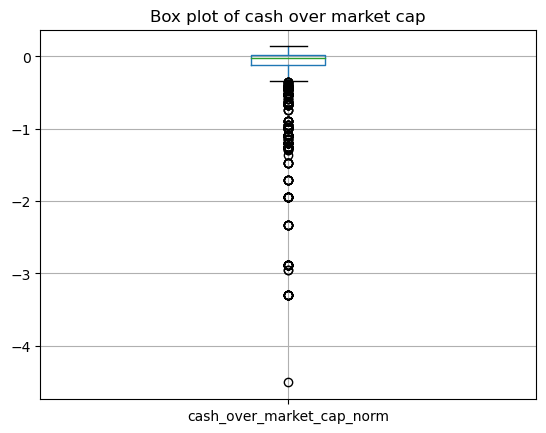

In [52]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

### RSI

In [53]:
public_companies['rsi'].describe()

count    8382.000000
mean       57.895449
std         8.067346
min        22.750000
25%        53.420000
50%        57.900000
75%        62.600000
max        81.660000
Name: rsi, dtype: float64

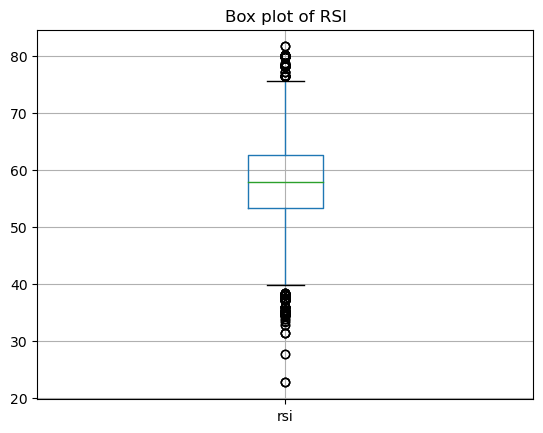

In [54]:
public_companies.boxplot('rsi')
plt.title('Box plot of RSI')
plt.show()

In [55]:
#public_companies = processOutliers(public_companies, 'rsi')

In [56]:
public_companies.shape

(8382, 24)

In [57]:
public_companies.describe()

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,employees,revenue_per_employee,profit_per_employee,rsi,total_yearly_compensation_norm,base_salary_norm,employees_norm,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm
count,8382.000000,8.382000e+03,8382.000000,8382.000000,8.382000e+03,8.382000e+03,8.382000e+03,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000
mean,149120.615605,2.275370e+05,8.131830,3.706991,3.542935e+05,8.054623e+05,1.658626e+05,57.895449,2.275370,1.491206,3.542935,8.054623,1.658626,0.086576,-0.096563
std,38185.086489,1.216136e+05,5.878674,3.009478,5.333248e+05,5.416472e+05,2.066371e+05,8.067346,1.216136,0.381851,5.333248,5.416472,2.066371,0.204768,0.302652
min,69000.000000,6.900000e+04,1.000000,1.000000,1.321000e+03,8.825100e+04,-4.688420e+05,22.750000,0.690000,0.690000,0.013210,0.882510,-4.688420,-0.374500,-4.506800
25%,123000.000000,1.490000e+05,4.000000,2.000000,5.000000e+04,3.769080e+05,1.995100e+04,53.420000,1.490000,1.230000,0.500000,3.769080,0.199510,-0.041700,-0.122400
50%,147000.000000,2.000000e+05,7.000000,3.000000,1.499000e+05,5.788080e+05,6.489600e+04,57.900000,2.000000,1.470000,1.499000,5.788080,0.648960,-0.010400,-0.021800
75%,170000.000000,2.710000e+05,11.000000,5.000000,2.210000e+05,1.029787e+06,3.734890e+05,62.600000,2.710000,1.700000,2.210000,10.297870,3.734890,0.171600,0.022300
max,288000.000000,1.733000e+06,40.000000,16.000000,1.525000e+06,2.298493e+06,1.005405e+06,81.660000,17.330000,2.880000,15.250000,22.984930,10.054050,0.863000,0.136900


# Categorical Data
## Individual Data

### Education Level

In [58]:
public_companies['education'].describe()

count                  8382
unique                    5
top       Bachelor's Degree
freq                   3972
Name: education, dtype: object

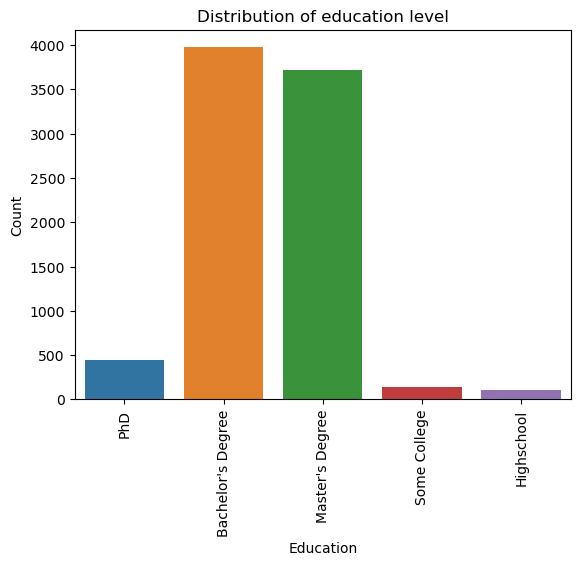

In [59]:
sns.countplot(x='education', data=public_companies)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(rotation=90)
plt.show()

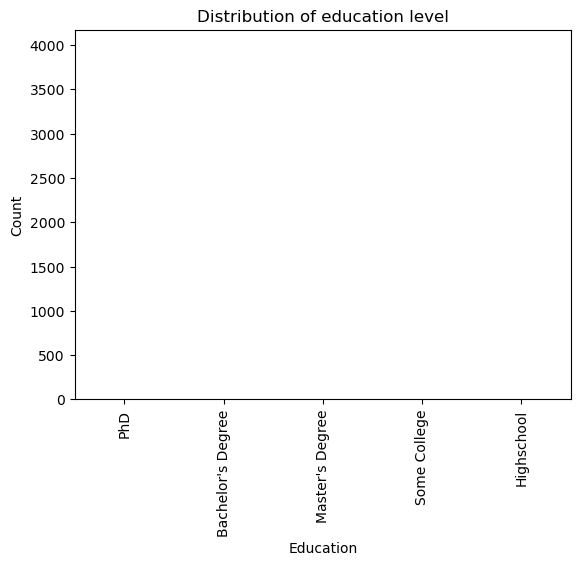

In [60]:
sns.countplot(x='education', data=public_companies, color='white')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(rotation=90)

plt.show()

import seaborn as sns1
sns1.set(rc={'axes.facecolor':'#091720', 'figure.facecolor':'#091720'})

sns1.countplot(x='education', data=public_companies, color='white')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(color = 'white', rotation=45)
plt.yticks(color='white')

sns1.set_style({'grid' : False})
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#091720')
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.grid(False)


plt.title('Distribution of education', color='white')
plt.xlabel("Education level", color='white')
plt.ylabel("Count", color='white')

plt.show()

## Title

In [61]:
public_companies['title'].describe()

count                  8382
unique                   15
top       Software Engineer
freq                   4769
Name: title, dtype: object

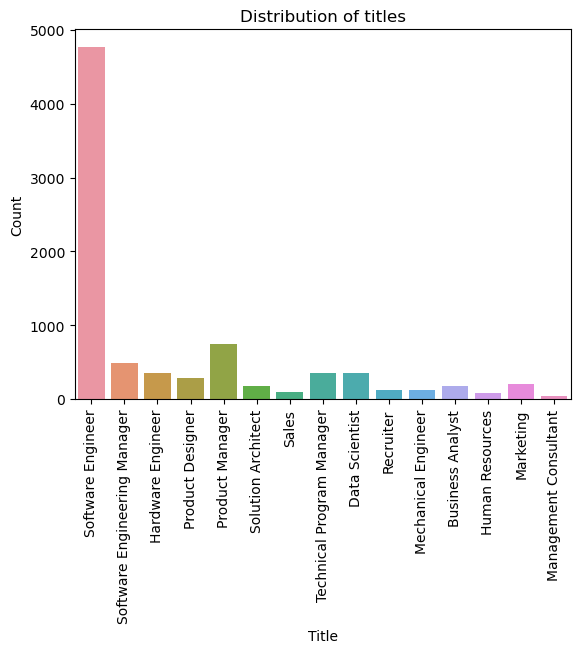

In [62]:
sns.countplot(x='title', data=public_companies)
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Distribution of titles')
plt.xticks(rotation=90)
plt.show()

### Race

In [63]:
public_companies['race'].describe()

count      8382
unique        5
top       Asian
freq       4153
Name: race, dtype: object

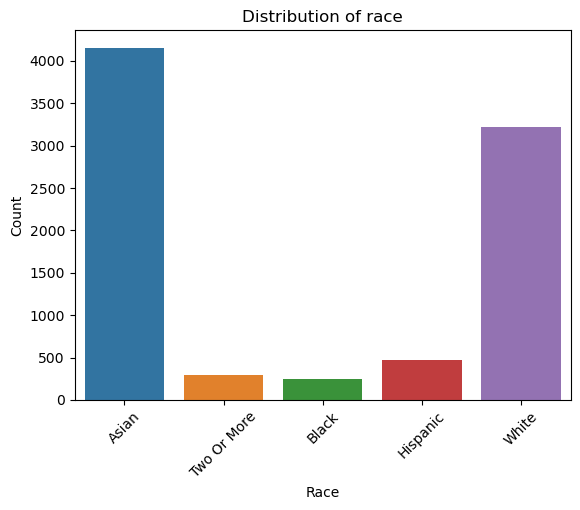

In [64]:
sns.countplot(x='race', data=public_companies)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.xticks(rotation=45)
plt.show()

### Sex

In [65]:
public_companies['sex'].describe()

count     8382
unique       3
top       Male
freq      6617
Name: sex, dtype: object

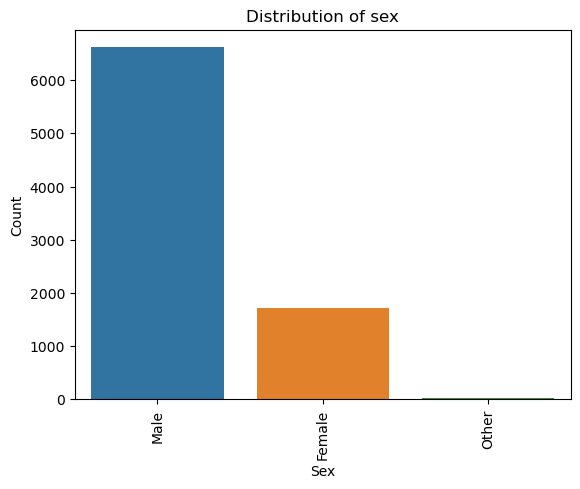

In [66]:
sns.countplot(x='sex', data=public_companies)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex')
plt.xticks(rotation=90)
plt.show()

## Company Data
### Market Cap Group

In [67]:
public_companies['mc_group'].describe()

count         8382
unique           5
top       Mega-Cap
freq          4932
Name: mc_group, dtype: object

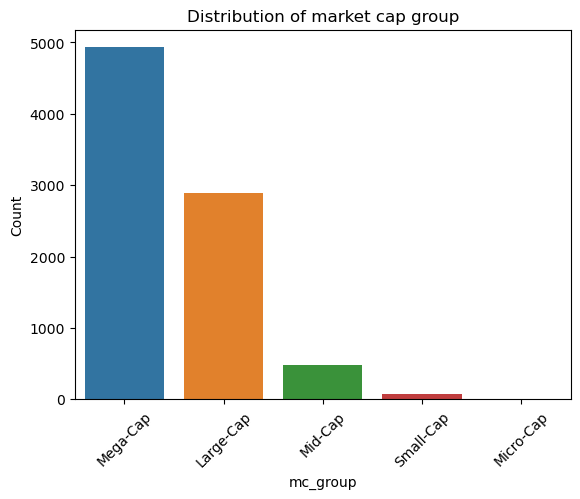

In [68]:
sns.countplot(x='mc_group', data=public_companies)
plt.xlabel('mc_group')
plt.ylabel('Count')
plt.title('Distribution of market cap group')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='mc_group', data=public_companies, color='white')
plt.xlabel('Market cap group', color='white')
plt.ylabel('Count', color='white')
plt.title('Distribution of market cap group', color='white')
plt.xticks(color = 'white', rotation=45)
plt.yticks(color='white')

sns.set_style({'grid' : False})
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#091720')
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')




plt.show()

### Sector

In [69]:
public_companies['sector'].describe()

count           8382
unique            10
top       Technology
freq            3515
Name: sector, dtype: object

In [70]:
public_companies.groupby('sector')['base_salary'].count()


sector
Communication Services    1708
Consumer Discretionary    1916
Consumer Staples            45
Energy                       5
Financials                 710
Healthcare                 125
Industrials                342
Materials                    4
Real Estate                 12
Technology                3515
Name: base_salary, dtype: int64

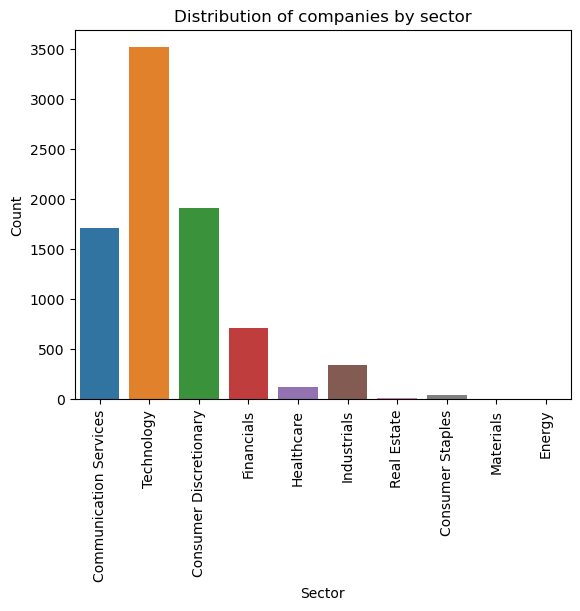

In [71]:
sns.countplot(x='sector', data=public_companies)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of companies by sector')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

## Individual Data
### Education

In [72]:
label_encoder = LabelEncoder()
public_companies['education_encoded'] = label_encoder.fit_transform(public_companies['education'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,sex,mc_group,sector,...,debt_growth_year_over_year,rsi,total_yearly_compensation_norm,base_salary_norm,employees_norm,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm,education_encoded
9927,145000,285000,Software Engineer,3,3,Bachelor's Degree,Two Or More,Male,Large-Cap,Healthcare,...,-8.53%,61.67,2.85,1.45,0.07172,3.29570,0.73300,-0.0853,0.1058,0
9161,197000,421000,Hardware Engineer,25,3,Master's Degree,Asian,Male,Mega-Cap,Communication Services,...,-5.47%,64.81,4.21,1.97,1.82381,16.85450,4.04620,-0.0547,0.0454,2
11049,180000,190000,Software Engineer,14,4,Master's Degree,Asian,Male,Mega-Cap,Financials,...,20.38%,71.97,1.90,1.80,3.09926,5.10135,1.54101,0.2038,-0.0513,2
6816,154000,205000,Software Engineer,5,2,Bachelor's Degree,White,Male,Mega-Cap,Consumer Discretionary,...,-3.22%,60.97,2.05,1.54,15.25000,3.76908,0.19951,-0.0322,-0.0264,0
413,210000,285000,Marketing,10,1,Bachelor's Degree,White,Male,Large-Cap,Technology,...,-15.55%,60.21,2.85,2.10,0.03416,9.09948,0.27738,-0.1555,0.0415,0


In [73]:
public_companies = pd.get_dummies(public_companies, columns=['education'], prefix='education', drop_first=True)

### Title

In [74]:
label_encoder = LabelEncoder()
public_companies['title_encoded'] = label_encoder.fit_transform(public_companies['title'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,race,sex,mc_group,sector,industry,...,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm,education_encoded,education_Highschool,education_Master's Degree,education_PhD,education_Some College,title_encoded
6890,144000,180000,Software Engineer,1,1,White,Male,Mega-Cap,Consumer Discretionary,Specialty Retail,...,3.76908,0.19951,-0.0322,-0.0264,0,False,False,False,False,11
4775,155000,201000,Software Engineer,5,3,Hispanic,Male,Mid-Cap,Technology,Software - Infrastructure,...,9.28927,1.68437,-0.1151,-0.0802,0,False,False,False,False,11
2413,135000,180000,Software Engineer,5,1,White,Male,Mid-Cap,Consumer Discretionary,Specialty Retail,...,8.33542,-0.51250,-0.0189,-0.3152,0,False,False,False,False,11
7505,253000,337000,Software Engineering Manager,12,2,White,Male,Large-Cap,Financials,Credit Services,...,5.07069,0.88137,0.0234,-0.1224,0,False,False,False,False,12
12435,139000,139000,Product Designer,20,2,White,Male,Large-Cap,Industrials,Conglomerates,...,3.85916,0.59558,0.0446,-0.0942,0,False,False,False,False,7


In [75]:
public_companies = pd.get_dummies(public_companies, columns=['title'], prefix='title', drop_first=True)

### Race

In [76]:
label_encoder = LabelEncoder()
public_companies['race_encoded'] = label_encoder.fit_transform(public_companies['race'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,race,sex,mc_group,sector,industry,employees,...,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,race_encoded
5866,184000,325000,6,6,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,...,False,False,False,False,False,True,False,False,False,0
4836,175000,240000,10,4,White,Male,Large-Cap,Communication Services,Telecom Services,186000.0,...,False,False,False,False,False,True,False,False,False,4
1884,107000,128000,4,4,White,Male,Large-Cap,Communication Services,Telecom Services,105400.0,...,False,False,False,False,False,False,False,False,False,4
8433,114000,122000,3,2,White,Male,Large-Cap,Financials,Credit Services,51987.0,...,False,False,False,False,False,True,False,False,False,4
9382,155000,200000,8,1,White,Male,Large-Cap,Communication Services,Entertainment,5680.0,...,False,False,True,False,False,False,False,False,False,4


In [77]:
public_companies = pd.get_dummies(public_companies, columns=['race'], prefix='race', drop_first=True)

### Sex

In [78]:
label_encoder = LabelEncoder()
public_companies['sex_encoded'] = label_encoder.fit_transform(public_companies['sex'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,sex,mc_group,sector,industry,employees,revenue_per_employee,...,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,race_encoded,race_Black,race_Hispanic,race_Two Or More,race_White,sex_encoded
2926,136000,168000,3,3,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,...,True,False,False,False,4,False,False,False,True,1
16092,150000,270000,12,1,Female,Mega-Cap,Consumer Discretionary,Specialty Retail,1525000.0,376908.0,...,False,False,False,False,0,False,False,False,False,0
16576,165000,253000,11,5,Male,Mega-Cap,Technology,Semiconductors,26000.0,872308.0,...,False,False,False,False,0,False,False,False,False,1
3047,165000,195000,16,16,Female,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,...,False,False,False,False,4,False,False,False,True,0
2590,157000,257000,9,2,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,...,False,False,False,False,0,False,False,False,False,1


In [79]:
public_companies = pd.get_dummies(public_companies, columns=['sex'], prefix='sex', drop_first=True)

## Company Data

## Market Cap Group

In [80]:
label_encoder = LabelEncoder()
public_companies['mc_group_encoded'] = label_encoder.fit_transform(public_companies['mc_group'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,...,title_Technical Program Manager,race_encoded,race_Black,race_Hispanic,race_Two Or More,race_White,sex_encoded,sex_Male,sex_Other,mc_group_encoded
8241,84000,110000,4,1,Large-Cap,Technology,Software - Application,22668.0,395756.0,76363.0,...,False,0,False,False,False,False,0,False,False,0
6634,86000,96000,1,1,Mega-Cap,Financials,Banks - Diversified,213000.0,462822.0,116742.0,...,False,0,False,False,False,False,0,False,False,1
1202,285000,511000,21,1,Mid-Cap,Technology,Software - Infrastructure,2530.0,410174.0,39189.0,...,False,4,False,False,False,True,0,False,False,3
3778,132000,250000,8,4,Mega-Cap,Consumer Discretionary,Specialty Retail,1525000.0,376908.0,19951.0,...,False,2,False,True,False,False,0,False,False,1
5271,119000,136000,1,1,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,...,False,0,False,False,False,False,1,True,False,1


In [81]:
public_companies = pd.get_dummies(public_companies, columns=['mc_group'], prefix='mc_group', drop_first=True)

## Sector

In [82]:
label_encoder = LabelEncoder()
public_companies['sector_encoded'] = label_encoder.fit_transform(public_companies['sector'])
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,...,race_White,sex_encoded,sex_Male,sex_Other,mc_group_encoded,mc_group_Mega-Cap,mc_group_Micro-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_encoded
11664,134000,147000,5,4,Technology,Software - Application,72682.0,479582.0,56905.0,0.54%,...,True,0,False,False,1,True,False,False,False,9
6292,150000,220000,10,2,Consumer Discretionary,Specialty Retail,1525000.0,376908.0,19951.0,-2.64%,...,False,1,True,False,1,True,False,False,False,1
7831,115000,140000,4,1,Technology,Software - Application,18200.0,829341.0,152198.0,-2.18%,...,False,0,False,False,0,False,False,False,False,9
14599,170000,220000,16,4,Communication Services,Telecom Services,67000.0,1172507.0,124134.0,-51.86%,...,False,1,True,False,0,False,False,False,False,0
8951,117000,149000,15,3,Technology,Software - Application,18200.0,829341.0,152198.0,-2.18%,...,False,0,False,False,0,False,False,False,False,9


In [83]:
public_companies = pd.get_dummies(public_companies, columns=['sector'], prefix='sector', drop_first=True)

In [84]:
for column in public_companies.columns:
    print(column)

base_salary
total_yearly_compensation
years_of_experience
years_at_company
industry
employees
revenue_per_employee
profit_per_employee
cash_over_market_cap
debt_growth_year_over_year
rsi
total_yearly_compensation_norm
base_salary_norm
employees_norm
revenue_per_employee_norm
profit_per_employee_norm
debt_growth_year_over_year_norm
cash_over_market_cap_norm
education_encoded
education_Highschool
education_Master's Degree
education_PhD
education_Some College
title_encoded
title_Data Scientist
title_Hardware Engineer
title_Human Resources
title_Management Consultant
title_Marketing
title_Mechanical Engineer
title_Product Designer
title_Product Manager
title_Recruiter
title_Sales
title_Software Engineer
title_Software Engineering Manager
title_Solution Architect
title_Technical Program Manager
race_encoded
race_Black
race_Hispanic
race_Two Or More
race_White
sex_encoded
sex_Male
sex_Other
mc_group_encoded
mc_group_Mega-Cap
mc_group_Micro-Cap
mc_group_Mid-Cap
mc_group_Small-Cap
sector_encod

# Correlation Analysis

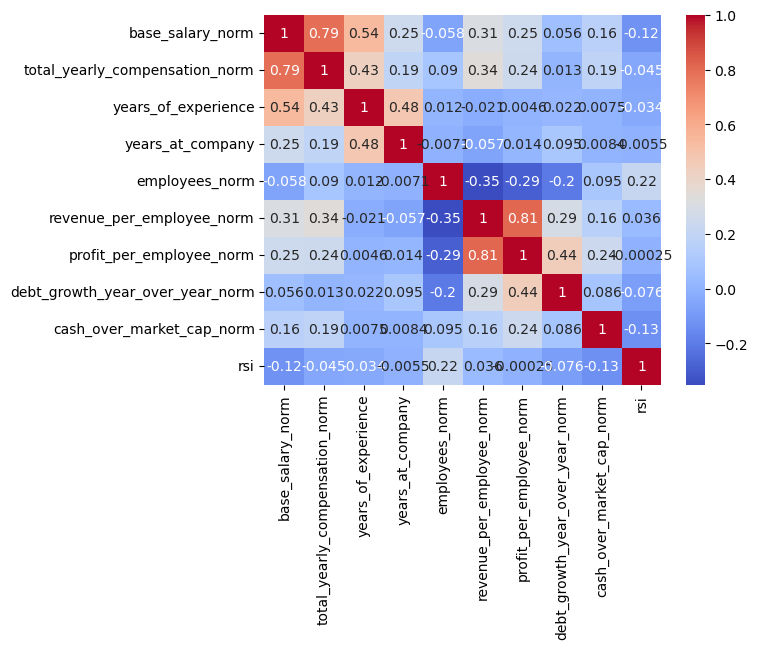

In [85]:
public_companies_cleaned = public_companies[['base_salary_norm', 'total_yearly_compensation_norm', 'years_of_experience', 'years_at_company',
                                             'employees_norm', 'revenue_per_employee_norm',
                                             'profit_per_employee_norm', 'debt_growth_year_over_year_norm', 'cash_over_market_cap_norm', 'rsi']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)

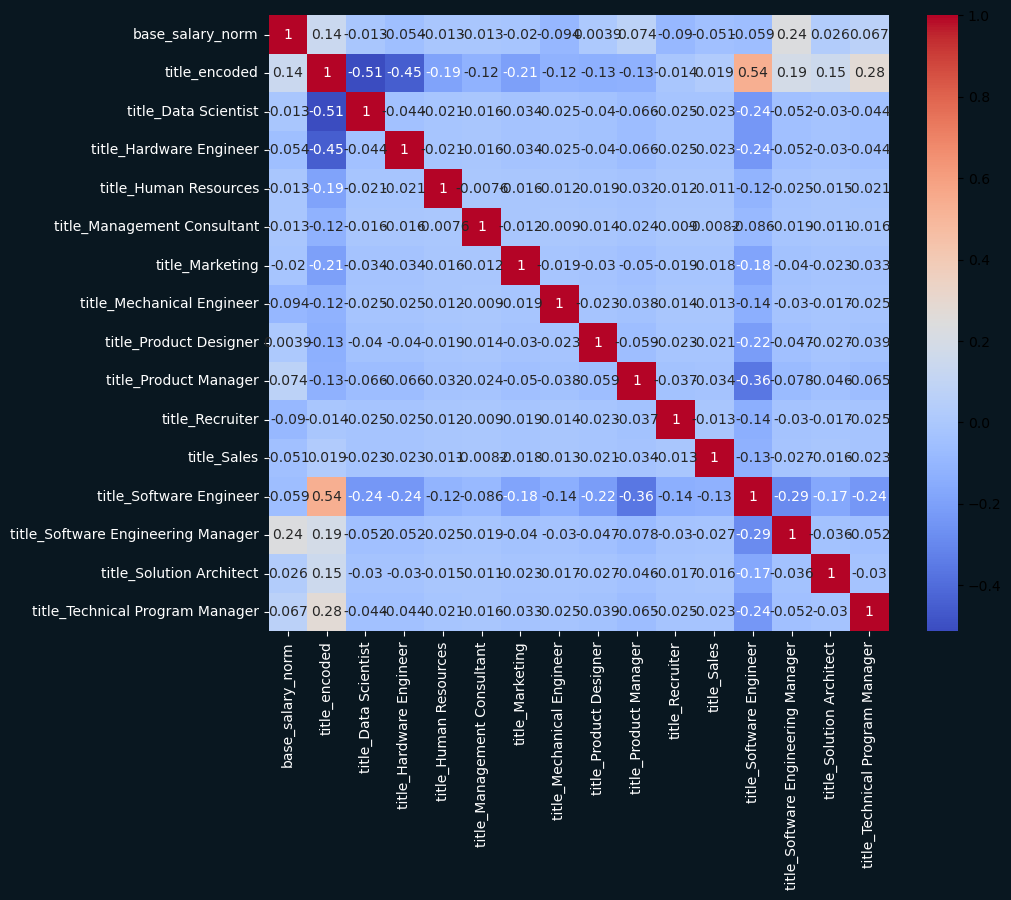

In [86]:
public_companies_cleaned = public_companies[['base_salary_norm', 'title_encoded', 'title_Data Scientist',
                                             'title_Hardware Engineer', 'title_Human Resources', 'title_Management Consultant',
                                             'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                             'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                             'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8), facecolor='#091720')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.tick_params(colors='white')
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)

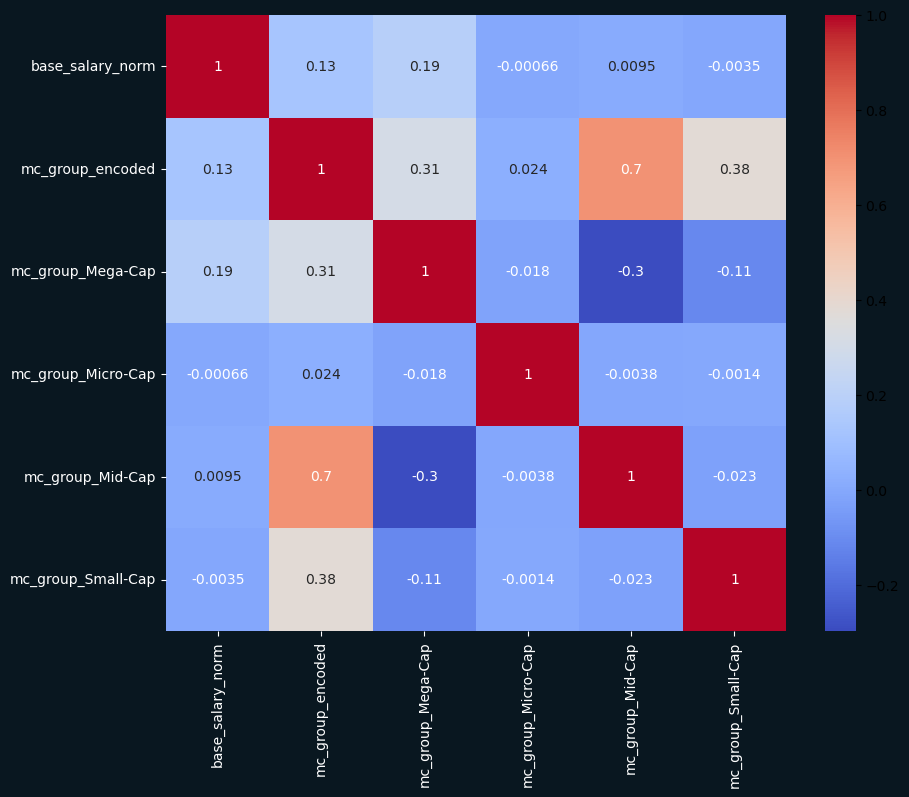

In [87]:
public_companies_cleaned = public_companies[['base_salary_norm', 'mc_group_encoded', 'mc_group_Mega-Cap',
                                             'mc_group_Micro-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8), facecolor='#091720')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.tick_params(colors='white')
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


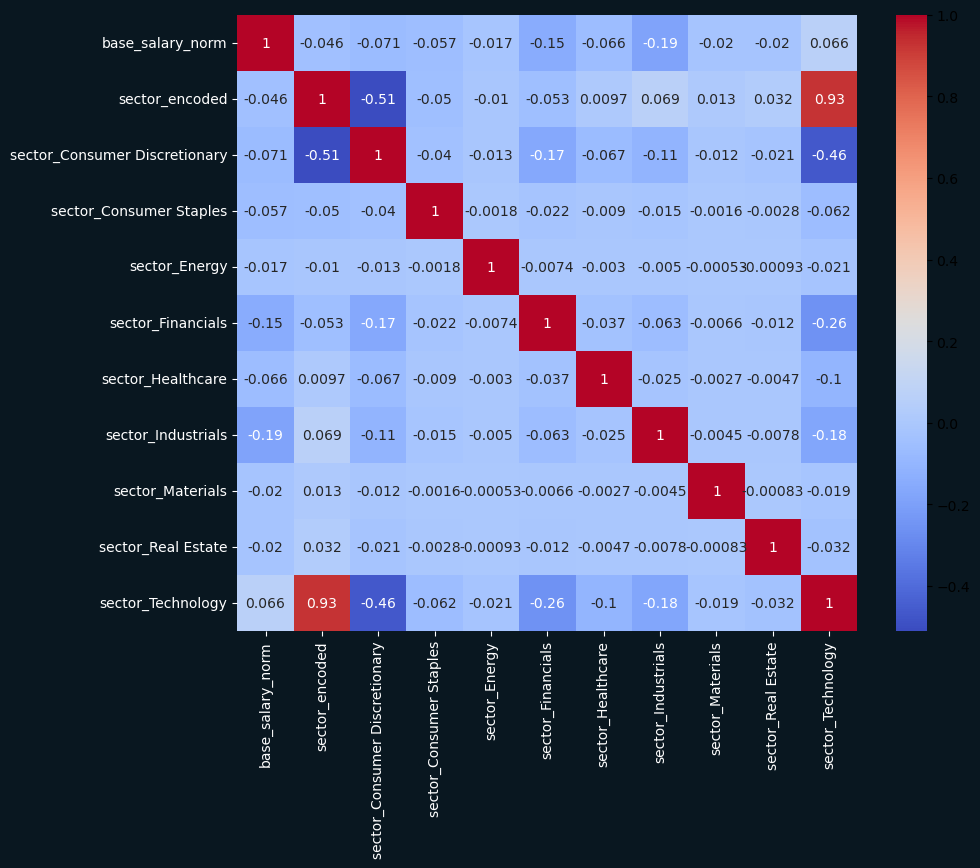

In [88]:
public_companies_cleaned = public_companies[['base_salary_norm', 'sector_encoded', 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                             'sector_Energy', 'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                             'sector_Materials', 'sector_Real Estate', 'sector_Technology']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8), facecolor='#091720')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.tick_params(colors='white')
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


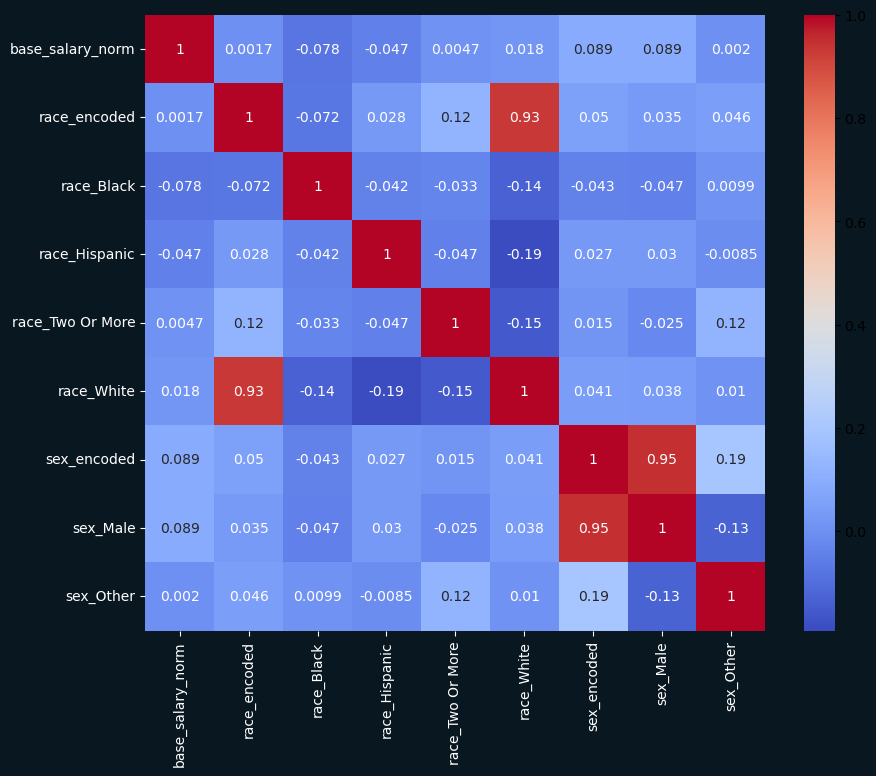

In [91]:
public_companies_cleaned = public_companies[['base_salary_norm', 'race_encoded', 'race_Black', 'race_Hispanic', 'race_Two Or More', 'race_White', 'sex_encoded',
                                             'sex_Male', 'sex_Other']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8), facecolor='#091720')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.tick_params(colors='white')
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


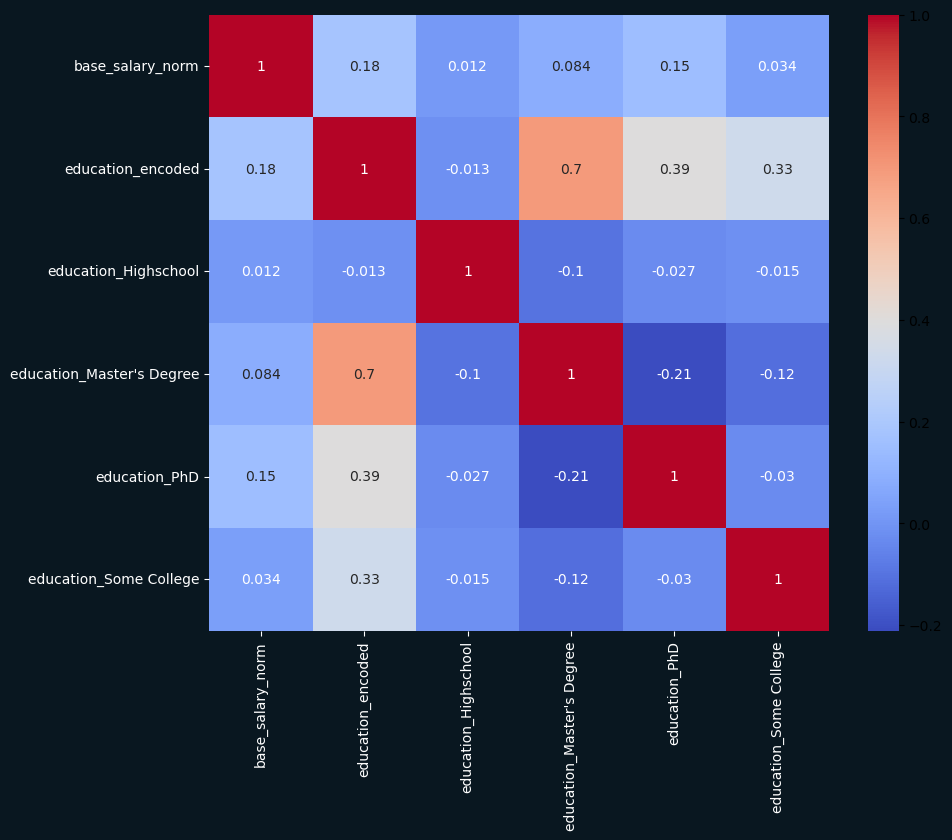

In [92]:
public_companies_cleaned = public_companies[['base_salary_norm', 'education_encoded', 'education_Highschool',
                                             'education_Master\'s Degree', 'education_PhD', 'education_Some College']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8), facecolor='#091720')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.tick_params(colors='white')
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()

public_companies_cleaned = public_companies[['base_salary_norm', 'total_yearly_compensation_norm', 'years_of_experience', 'years_at_company', 'education_encoded',
                                             'title_encoded', 'race_encoded', 'sex_encoded', 'mc_group_encoded', 'sector_encoded', 'employees_norm', 'revenue_per_employee_norm',
                                             'profit_per_employee_norm', 'debt_growth_year_over_year_norm', 'cash_over_market_cap_norm', 'rsi']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", color='white')
plt.xticks(color = 'white')
plt.yticks(color='white')
plt.show()